In [38]:
import os
if os.path.exists('../kaggle/input/digit-recognizer/train.csv'):
    print("File exists")
else:
    print("File does not exist")

File exists


In [39]:
import os
if os.path.exists('../kaggle/input/digit-recognizer/train.csv'):
    print("File exists")
else:
    print("File does not exist")

File exists


In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [41]:
#set data to our training data
data = pd.read_csv('../kaggle/input/digit-recognizer/train.csv')
data.head()
data.shape

(42000, 785)

In [42]:
#shape data in a matrix to make it in terms of columns
npData=data.to_numpy().T
npData.shape

(785, 42000)

In [43]:
#set dimensions in terms of variables
n,mTotal=npData.shape
print(n,mTotal)

785 42000


In [44]:
## set image data as a column vector. Label data is 0th label row 
labelData=npData[0, :]
labelData=labelData.reshape(1,labelData.size) #reshape by 1 row by num of entries)
labelData.shape

(1, 42000)

In [45]:
#selects data from first image to n-1th image. 42000 image's pixels are column vectors
imageData=npData[1:n, :]
imageData.shape

(784, 42000)

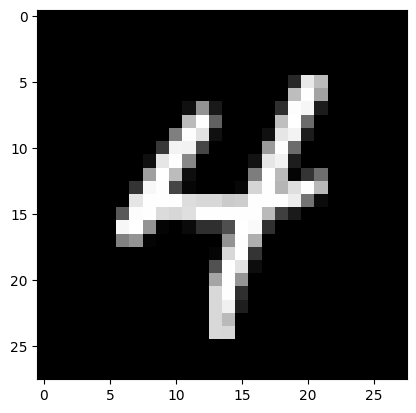

label 4


In [46]:
#plot kth image
k=40
kthImagedata=imageData[:, k-1].reshape(28,28)
kthImagedata.shape
plt.gray()
plt.imshow(kthImagedata, interpolation='nearest')
plt.show()
print('label', labelData[0, k-1])

In [47]:
Xtest = imageData[:, 0:2000] # 0-2000 is saved for test
Ytest = labelData[:, 0:2000] # label values of 0-2000 saved for testing
Xtest.shape

(784, 2000)

In [48]:
X = imageData[:, 2000:mTotal]/255 #this is a0
Y_bar = labelData[:, 2000:mTotal] #this is y
n_x,m=X.shape
Y_bar.shape

(1, 40000)

In [49]:
ex= np.arange(35).reshape(5,7)
ex

array([[ 0,  1,  2,  3,  4,  5,  6],
       [ 7,  8,  9, 10, 11, 12, 13],
       [14, 15, 16, 17, 18, 19, 20],
       [21, 22, 23, 24, 25, 26, 27],
       [28, 29, 30, 31, 32, 33, 34]])

In [50]:
rowInd = np.array([0,2,4])
rowInd = rowInd.reshape(1, rowInd.size)
rowInd.shape

(1, 3)

In [51]:
colInd = np.array([0,1,2])
colInd = colInd.reshape(1, colInd.size)
colInd.shape

(1, 3)

In [52]:
ex[rowInd, colInd]

array([[ 0, 15, 30]])

In [53]:
ex[:,:]=0

In [54]:
ex[rowInd, colInd]=1000
ex

array([[1000,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0],
       [   0, 1000,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0],
       [   0,    0, 1000,    0,    0,    0,    0]])

In [55]:
def labelsToProbVectors(no_of_categories, Y_bar):
    Y=np.zeros((no_of_categories, Y_bar.size))
    Y[Y_bar,np.arange(Y_bar.size)]=1
    return Y

In [56]:
Y = labelsToProbVectors(10, Y_bar)
k = skibidi = 1000
print(Y[:,k], Y_bar[0,k])

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.] 7


In [57]:
def linearMap(w, x, b):
    return np.matmul(w, x)+b

In [58]:
def Wb(nh0, nh1):
    W = np.random.rand(nh1, nh0)-.5
    b = np.random.rand(nh1, 1) -.5
    return W, b
W, b =Wb(784, 10)

In [59]:
def softmax(z):
    z -= np.max(z, axis=0, keepdims=True)
    exp_z = np.exp(z)
    return exp_z / np.sum(exp_z, axis=0, keepdims=True)

$\bullet$ Create a function, $Wb,$ that outputs a random matrix $W$ and a random vector $b$ with matrix size being $n_h^o\times n_h^i$ and the random vector with size $n_h^o\times 1.$  
$n_h^o$ is the output dimension and $n_h^i$ is the input dimension  
The entries should be random numbers between -0.5 and 0.5

$\bullet$ Create a function named "layer" that takes the inputs:  

> (i) $n_h^i$: dimension of the input for the layer  
> (ii) $n_h^o$: dimension of the output of the layer  
> (iii) $W$ a matrix of dimension $n_h^o\times n_h^i$ and $b \in R^{n_h^o}.$  
> (iv) A nonlinear function $f$  
> (v) Output should be $f(W*a+b)$ where $a$ as input


In [60]:
def layer(a, W, b, f):
    z=W@a+b
    return z, f(z)


In [61]:
def ReLu(z):
    return z * (z > 0)


In [62]:
def forwardProp(X,W1,b1,f1,W2,b2,f2):
    z1,a1=layer(X,W1,b1,f1)
    z2,a2=layer(a1,W2,b2,f2)
    return z1,a1,z2,a2



In [63]:
nh0=784
nh1=10
nh2=10
# W1, b1 = Wb(784, 10)
# W2, b2 = Wb(10, 10)
# b1.shape
# a2 = forwardProp(X, W1, b1, ReLu, W2, b2, softmax)
W1,b1=Wb(784,10)
W2,b2=Wb(10,10)
#z1,a1,z2,a2=forwardProp(X,W1,b1,ReLu,W2,b2,softmax)

In [64]:
def crossEntropy(y, a):
    np.sum(np.multiply(a, y))

In [65]:
def derivative_relu(z):
    return z>0

In [66]:
def clip_gradients(gradients, threshold=5.0):
    for gradient in gradients:
       np.clip(gradient, -threshold, threshold, out=gradient)
    return gradients


In [67]:
def backPropagation(W1, b1, W2, b2, alpha, z1, z2, a1, a2, Y, X):
    dz2 = a2 - Y
    dW2 = dz2 @ a1.T
    db2 = np.sum(dz2, axis=1).reshape(10, 1)
    da1 = W2.T @ dz2
    dz1 = np.multiply(da1, derivative_relu(z1))
    dW1 = dz1 @ X.T
    db1 = np.sum(dz1, axis=1).reshape(10, 1)


    # Clip gradients before using them to update weights
    gradients = [dW1, dW2, db1, db2]
    gradients = clip_gradients(gradients)

    # Update weights and biases
    W1 -= alpha * gradients[0]
    W2 -= alpha * gradients[1]
    b1 -= alpha * gradients[2]
    b2 -= alpha * gradients[3]
    return W1, W2, b1, b2


In [68]:
'''for x in range(500):
    z1, a1, z2, a2 = forwardProp(X, W1, b1, ReLu, W2, b2, softmax)
    W1, W2, b1, b2 = backPropagation(W1, b1, W2, b2, .001, z1, z2, a1, a2, Y, X)
    '''

'for x in range(500):\n    z1, a1, z2, a2 = forwardProp(X, W1, b1, ReLu, W2, b2, softmax)\n    W1, W2, b1, b2 = backPropagation(W1, b1, W2, b2, .001, z1, z2, a1, a2, Y, X)\n    '

In [69]:
'''z1,a1,z2,a2=forwardProp(Xtest,W1,b1,ReLu,W2,b2,softmax)'''

'z1,a1,z2,a2=forwardProp(Xtest,W1,b1,ReLu,W2,b2,softmax)'

In [70]:
#yhat = np.argmax(a2, axis=0).reshape(2000,1)

In [71]:
'''counter= 0
Ytest = Ytest.T
yhat.shape'''

'counter= 0\nYtest = Ytest.T\nyhat.shape'

In [72]:
m = 2000
Ytest.shape

(1, 2000)

In [73]:
'''for i in range(m):
    if Ytest[[i]]==yhat[[i]]:
        counter +=1
print(counter)'''

'for i in range(m):\n    if Ytest[[i]]==yhat[[i]]:\n        counter +=1\nprint(counter)'

In [74]:
def get_predictions(a):
    return np.argmax(a, axis=0)

def get_accuracy(predictions, Y_bar):
    print(predictions, Y_bar)
    return np.sum(predictions == Y_bar) / Y_bar.size

In [75]:
for i in range(100):
    z1, a1, z2, a2 = forwardProp(X, W1, b1, ReLu, W2, b2, softmax)
    W1, W2, b1, b2 = backPropagation(W1, b1, W2, b2, .001, z1, z2, a1, a2, Y, X)
    if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(a2)
            print(get_accuracy(predictions, Y_bar))

Iteration:  0
[9 9 9 ... 1 0 9] [[3 1 6 ... 7 6 9]]
0.123575
Iteration:  10
[8 1 8 ... 7 0 8] [[3 1 6 ... 7 6 9]]
0.417925
Iteration:  20
[8 1 6 ... 7 0 9] [[3 1 6 ... 7 6 9]]
0.66525
Iteration:  30
[8 1 6 ... 7 6 9] [[3 1 6 ... 7 6 9]]
0.768975
Iteration:  40
[8 1 6 ... 7 6 9] [[3 1 6 ... 7 6 9]]
0.8075
Iteration:  50
[3 1 6 ... 7 6 9] [[3 1 6 ... 7 6 9]]
0.827575
Iteration:  60
[3 1 6 ... 7 6 9] [[3 1 6 ... 7 6 9]]
0.83885
Iteration:  70
[3 1 6 ... 7 6 9] [[3 1 6 ... 7 6 9]]
0.8469
Iteration:  80
[3 1 6 ... 7 6 9] [[3 1 6 ... 7 6 9]]
0.854
Iteration:  90
[3 1 6 ... 7 6 9] [[3 1 6 ... 7 6 9]]
0.857575


In [76]:
imdata = pd.read_csv('../kaggle/input/digit-recognizer/data.csv')
imdata.shape
imdata.head()

,0,1,2,3,4,5,6,7,8,9
0,1,1,2,1,9,1,1,7,1,0
1,1,1,1,1,0,1,1,0,1,5
2,1,1,0,1,3,1,1,5,1,4
3,1,1,4,1,0,1,1,5,1,0
4,1,1,10,1,12,1,1,3,1,1


In [77]:
imx = imdata.to_numpy()
imx.shape


(784, 10)

In [78]:
labelimx=np.matrix([0,1,2,3,4,5,6,7,8,9])
labelimx=labelimx.reshape(1,labelimx.size) #reshape by 1 row by num of entries)
labelimx.shape

(1, 10)

In [79]:
dataimx=imx[0:784, :]
dataimx.shape

(784, 10)

In [80]:
z1, a1, z2, a2 = forwardProp(dataimx, W1, b1, ReLu, W2, b2, softmax)
predictions = get_predictions(a2)
print(get_accuracy(predictions, labelimx))

[2 1 2 3 4 5 5 2 5 4] [[0 1 2 3 4 5 6 7 8 9]]
0.5
